# Ovce domácí (*Ovis aries*) 

## Uvod

>Ovce domácí (*Ovis aries*) je prastarým průvodcem člověka, 
>tento domestikovaný přežvýkavec vystupuje v mytologických bájích, 
>je významným biblickým symbolem, dodnes se vyskytuje v různých 
>rčeních a příslovích. Zřejmě znáte beránka božího, před spaním počítáte ovečky, 
>možná jste černou ovcí své rodiny, nebo jste se narodili v tomto znamení čínského 
>horoskopu, po večerech sledujete ovečku Shaun the Sheep či Černé ovce. 
>
>Dále je také důležitým zdrojem vlny (včetně dnes moderního merina), masa a mléka. 
>Z ovčích rohů se vyrábějí střenky nožů, z ovčích střívek výplety do tenisových raket, 
>z ovčího loje se vyráběly svíčky a ovčí vosk lanolin se užívá v kosmetice či v krémech na boty. 
>Dnešní ovce domácí byla domestikována několikrát nezávisle na sobě a proto jsou si jednotlivá plemena nepříbuzná, 
>jejich předci byli muflon evropský (*Ovis orientalis musimon*), muflon asijský  (*Ovis orientalis orientalis*), 
>ovce kruhorohá (*Ovis orientalis arkal*), ovce stepní (*Ovis vignei*), ovce středoasijská (*Ovis ammon*). 
>
>Pro biology se staly ovce modelovým organismem a jedním z prvních klonovaných zvířat. Ovce Dolly žila 
>mezi lety 1996  a 2003 na Roslin institutu v Edinburghu. Ovce se dožívají i 12 let, ale Dolly trpící po 5 
>letech artritidou podlehla rakovině plic po 6,5 letech života, a to zřejmě také kvůli ustájení v budově, 
>na což ovce nejsou zvyklé. Do roku 2016 bylo naklonováno 13 ovcí ze stejné linie jako Dolly. Nejsou známé 
>žádné průkazné neduhy způsobené klonováním. 

> **GENOM**
> 27 chromozomu
>
> 2615.52 Mb
>
>43046 proteinu
>
>42 % GC
>
>rok vydani: 2012

![](https://s-media-cache-ak0.pinimg.com/564x/24/df/28/24df2822145c1de8c5d6da7ecabeb08e.jpg)

## Import dulezitych funkci a souboru a jejich modifikace

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab as pl

In [ ]:
!cat /home/ja/Data/ovis/Ovis_aries.Oar_v3.1.86.chr.gtf | grep -E "\s+gene\s+" > Ovis_gene.gtf
!cat /home/ja/Data/ovis/Ovis_aries.Oar_v3.1.86.chr.gtf | grep -E "\s+transcript\s+" > Ovis_transcript.gtf

In [2]:
genes=pd.read_table('/home/ja/Data/ovis/Ovis_gene.gtf', header=None, dtype={0:np.object})   
transcripts=pd.read_table('/home/ja/Data/ovis/Ovis_transcript.gtf', header=None, dtype={0:np.object})

In [3]:
genes.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
transcripts.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [4]:
genes.head()

,seqname,source,feature,start,end,score,strand,frame,attribute
0,1,ensembl,gene,23392,176938,.,-,.,"gene_id ""ENSOARG00000017577""; gene_version ""1""..."
1,1,ensembl,gene,49751,49903,.,+,.,"gene_id ""ENSOARG00000020430""; gene_version ""1""..."
2,1,ensembl,gene,79926,87689,.,+,.,"gene_id ""ENSOARG00000017587""; gene_version ""1""..."
3,1,ensembl,gene,91112,96882,.,+,.,"gene_id ""ENSOARG00000025485""; gene_version ""1""..."
4,1,ensembl,gene,105668,108573,.,-,.,"gene_id ""ENSOARG00000017595""; gene_version ""1""..."


In [5]:
def parse_attributes(attributes_str):
    
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotype"])
    
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        import re
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out

In [6]:
def split_attribute_column(df):
   
    attributes_columns = df.attribute.apply(parse_attributes).apply(pd.Series)
    return pd.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)

genes = split_attribute_column(genes)
transcripts = split_attribute_column(transcripts)
#script nefungoval (re not defined), bylo treba dodat "import re" do scriptu

## Deskriptivni analyza dat

In [7]:
genes.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
0,1,ensembl,gene,23392,176938,.,-,.,protein_coding,ENSOARG00000017577,ING5
1,1,ensembl,gene,49751,49903,.,+,.,protein_coding,ENSOARG00000020430,NaN
2,1,ensembl,gene,79926,87689,.,+,.,protein_coding,ENSOARG00000017587,PDCD1
3,1,ensembl,gene,91112,96882,.,+,.,lincRNA,ENSOARG00000025485,NaN
4,1,ensembl,gene,105668,108573,.,-,.,protein_coding,ENSOARG00000017595,GAL3ST2


In [8]:
transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
0,1,ensembl,transcript,23392,176938,.,-,.,protein_coding,ENSOARG00000017577,ING5,protein_coding,ENSOART00000019126,ING5-201
1,1,ensembl,transcript,49751,49903,.,+,.,protein_coding,ENSOARG00000020430,NaN,protein_coding,ENSOART00000022247,NaN
2,1,ensembl,transcript,79926,87689,.,+,.,protein_coding,ENSOARG00000017587,PDCD1,protein_coding,ENSOART00000019136,PDCD1-201
3,1,ensembl,transcript,91112,96882,.,+,.,lincRNA,ENSOARG00000025485,NaN,lincRNA,ENSOART00000027409,NaN
4,1,ensembl,transcript,105668,108573,.,-,.,protein_coding,ENSOARG00000017595,GAL3ST2,protein_coding,ENSOART00000019146,GAL3ST2-201


###### Pocet a typ chromozomu ovce

In [9]:
genes["seqname"].unique()

array(['1', '2', '3', 'X', '4', '6', '5', '7', '9', '8', '10', '13', '15',
       '12', '17', '16', '18', '14', '23', '11', '19', '20', '22', '21',
       '25', '26', '24', 'MT'], dtype=object)

> Pracuji s genomickymi daty samice ovce. 
> Ma 26 paru autozomu jeden par X chromozomu. 
> Dataset obsahuje take sekvence mitchondrialni DNA.

In [10]:
genes["seqname"].value_counts()

1     2550
3     2533
2     1988
5     1377
11    1365
14    1310
X     1193
7     1104
15     985
4      981
13     938
24     796
6      791
12     788
20     784
21     771
18     768
17     728
19     656
9      641
8      595
10     544
22     489
16     452
23     409
25     362
26     312
MT      37
Name: seqname, dtype: int64

### Pocet genu a transkriptu

##### Pocet genu

In [11]:
genes_count = len(genes["gene_id"].unique())
genes_count

26247

##### Pocet genu na vlakno

In [12]:
(genes["strand"].value_counts())

+    13425
-    12822
Name: strand, dtype: int64

##### Prumernz pocet genu na vlakno

In [14]:
genes["gene_size"] = genes["end"] - genes["start"]
(genes.groupby(["strand"]).gene_size.sum())/(genes["strand"].value_counts())

strand
+    33432.046108
-    33596.795664
dtype: float64

##### Pocet genu dle funkce (biotypu)

In [15]:
genes["gene_biotype"].value_counts()

protein_coding          20150
lincRNA                  1858
miRNA                    1288
snRNA                    1228
snoRNA                    753
misc_RNA                  357
rRNA                      299
pseudogene                247
processed_pseudogene       43
Mt_tRNA                    22
Mt_rRNA                     2
Name: gene_biotype, dtype: int64

##### Pocet transkriptu dle funkce (biotypu)

In [16]:
transcripts_count = len(transcripts["transcript_id"].unique())
transcripts_count

28294

##### Pocet transkriptu 

In [17]:
transcripts["transcript_biotype"].value_counts()

protein_coding          22035
lincRNA                  2020
miRNA                    1288
snRNA                    1228
snoRNA                    753
misc_RNA                  357
rRNA                      299
pseudogene                247
processed_pseudogene       43
Mt_tRNA                    22
Mt_rRNA                     2
Name: transcript_biotype, dtype: int64

##### Rozdil poctu transkriptu a poctu genu

In [18]:
transcripts_count-genes_count

2047

##### Rozdil poctu transkriptu a poctu genu dle funkce (biotypu)

In [19]:
transcripts["transcript_biotype"].value_counts() - genes["gene_biotype"].value_counts()

protein_coding          1885
lincRNA                  162
miRNA                      0
snRNA                      0
snoRNA                     0
misc_RNA                   0
rRNA                       0
pseudogene                 0
processed_pseudogene       0
Mt_tRNA                    0
Mt_rRNA                    0
dtype: int64

##### Procentualni rozdil poctu transkriptu a genu

In [20]:
(transcripts["transcript_biotype"].value_counts() - genes["gene_biotype"].value_counts())/genes["gene_biotype"].value_counts() 

protein_coding          0.093548
lincRNA                 0.087191
miRNA                   0.000000
snRNA                   0.000000
snoRNA                  0.000000
misc_RNA                0.000000
rRNA                    0.000000
pseudogene              0.000000
processed_pseudogene    0.000000
Mt_tRNA                 0.000000
Mt_rRNA                 0.000000
dtype: float64

#####  Velikost genu

In [21]:
genes["gene_size"] = genes["end"] - genes["start"]
genes["gene_size"].describe()

count      26247.000000
mean       33512.528403
std        72258.579940
min           40.000000
25%         1012.000000
50%         8218.000000
75%        31934.500000
max      1398865.000000
Name: gene_size, dtype: float64

##### Velikost transkriptu

In [22]:
transcripts["transcript_size"] = transcripts["end"] - transcripts["start"]
transcripts["transcript_size"].describe()

count      28294.000000
mean       34833.254117
std        72247.004097
min           40.000000
25%         1210.000000
50%         9158.500000
75%        34676.500000
max      1398865.000000
Name: transcript_size, dtype: float64

In [23]:
%matplotlib inline

##### Graficke srovnani velikosti genu a transkriptu

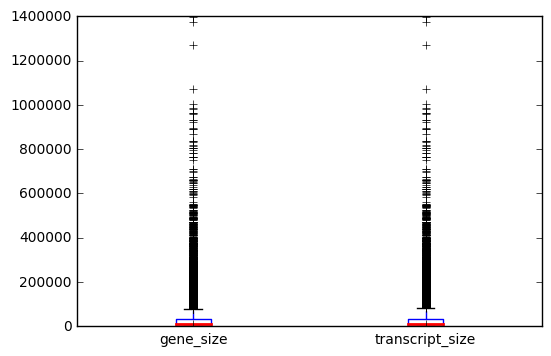

In [24]:
import matplotlib.pyplot as plt
plt.boxplot
a = genes["gene_size"]
b = transcripts["transcript_size"]
c = [a, b]
ax1 = plt.boxplot(c)
plt.setp(ax1['medians'], linewidth=2) 
plt.xticks([1,2], ["gene_size", "transcript_size"])
plt.show()

#####  Graficke srovnani velikosti transkriptu dle funkce (biotypu)

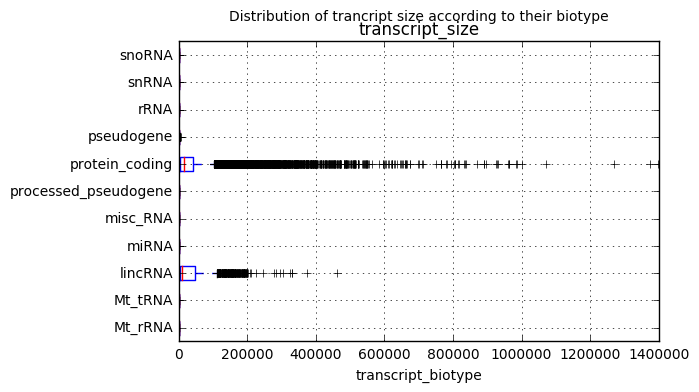

In [25]:
transcripts.boxplot(column="transcript_size", by="transcript_biotype", vert=False)
pl.suptitle("Distribution of trancript size according to their biotype")


##### Nejvetsi geny

In [26]:
genes[genes['gene_size'] > 1000000]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_size
3774,2,ensembl,gene,167894700,168966473,.,+,.,protein_coding,ENSOARG00000010057,LRP1B,1071773
4584,3,ensembl,gene,1442982,2818577,.,-,.,protein_coding,ENSOARG00000002277,NaN,1375595
6316,3,ensembl,gene,168090905,169093427,.,-,.,protein_coding,ENSOARG00000013294,NaN,1002522
9946,6,ensembl,gene,113502984,114772068,.,-,.,protein_coding,ENSOARG00000011847,NaN,1269084
12976,9,ensembl,gene,63608850,65007715,.,+,.,protein_coding,ENSOARG00000011267,CSMD3,1398865


> nejdelsi geny pres 1 Mbp:
> LRP1B = Low-Density Lipoprotein Receptor-Related Protein-Deleted In Tumor (na Chr 2)
> CSMD3 = CUB And Sushi Multiple Domains 3
    > CUB domena komplementu C1
    > Sushi domena aka Complement control protein CCP

##### Vicenasobne transkribovane geny

In [27]:
transcripts["gene_id"].value_counts()

ENSOARG00000006110    6
ENSOARG00000005194    6
ENSOARG00000011446    4
ENSOARG00000019877    3
ENSOARG00000026410    3
ENSOARG00000009339    3
ENSOARG00000014162    3
ENSOARG00000007041    3
ENSOARG00000026261    3
ENSOARG00000004567    3
ENSOARG00000011997    3
ENSOARG00000009212    3
ENSOARG00000026621    3
ENSOARG00000025703    3
ENSOARG00000018779    3
ENSOARG00000018584    3
ENSOARG00000017222    3
ENSOARG00000020941    3
ENSOARG00000007237    3
ENSOARG00000002755    3
ENSOARG00000026065    3
ENSOARG00000008860    3
ENSOARG00000010969    3
ENSOARG00000009820    3
ENSOARG00000025675    3
ENSOARG00000001544    3
ENSOARG00000010453    3
ENSOARG00000001605    3
ENSOARG00000008370    3
ENSOARG00000002951    3
                     ..
ENSOARG00000024916    1
ENSOARG00000014758    1
ENSOARG00000004853    1
ENSOARG00000004566    1
ENSOARG00000021035    1
ENSOARG00000000539    1
ENSOARG00000008046    1
ENSOARG00000008861    1
ENSOARG00000022631    1
ENSOARG00000024720    1
ENSOARG000000195

##### Celkovy pocet vicenasobne transkribovanych genu

In [28]:
sum(transcripts["gene_id"].value_counts() > 1)

1964

##### Z toho dvojnasobne transkribovane geny

In [29]:
sum(transcripts["gene_id"].value_counts() == 2)

1888

##### Procentualni mnozstvi dvojnasobne transkribovanych genu

In [1]:
1888/1964

0.9613034623217923

##### A trojnasobne transkribovane geny

In [30]:
sum(transcripts["gene_id"].value_counts() == 3)

73

##### Procentualni zastoupeni trojnasobne transkribovanych genu

In [31]:
73/1964

0.037169042769857434

##### Vice nez trojnasobne transkribovane geny

In [32]:
print(genes.loc[genes['gene_id'].isin(["ENSOARG00000005194"])])

      seqname   source feature     start       end score strand frame  \
24684      21  ensembl    gene  49121961  49187027     .      +     .   

         gene_biotype             gene_id gene_name  gene_size  
24684  protein_coding  ENSOARG00000005194       NaN      65066  


In [33]:
print(genes.loc[genes['gene_id'].isin(["ENSOARG00000006110"])])

      seqname   source feature     start       end score strand frame  \
24308      21  ensembl    gene  37857129  38232441     .      -     .   

         gene_biotype             gene_id gene_name  gene_size  
24308  protein_coding  ENSOARG00000006110       NaN     375312  


In [34]:
print(genes.loc[genes['gene_id'].isin(["ENSOARG00000011446"])])

      seqname   source feature     start       end score strand frame  \
16175      15  ensembl    gene  79226138  79261515     .      -     .   

         gene_biotype             gene_id gene_name  gene_size  
16175  protein_coding  ENSOARG00000011446       NaN      35377  


##### Histogram velikost genu v zavislosti na chromozomu

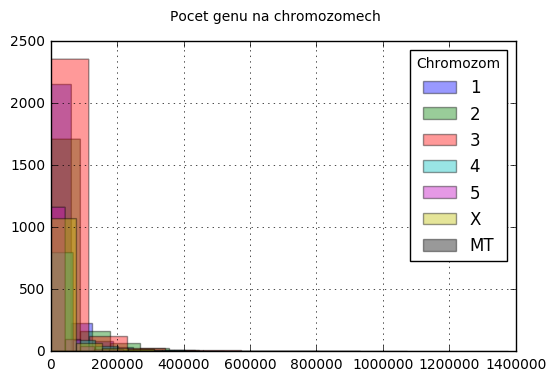

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
genes[genes.seqname =="1"].gene_size.hist(alpha=0.4, bins=15)
genes[genes.seqname =="2"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="3"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="4"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="5"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="X"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="MT"].gene_size.hist(alpha=0.4, bins=12)
ax.legend(['1', '2', '3', '4', '5', 'X', 'MT'], title="Chromozom")
pl.suptitle("Pocet genu na chromozomech")

###### Vyneseni vsech chromozomu je neprehledne, ale mozne

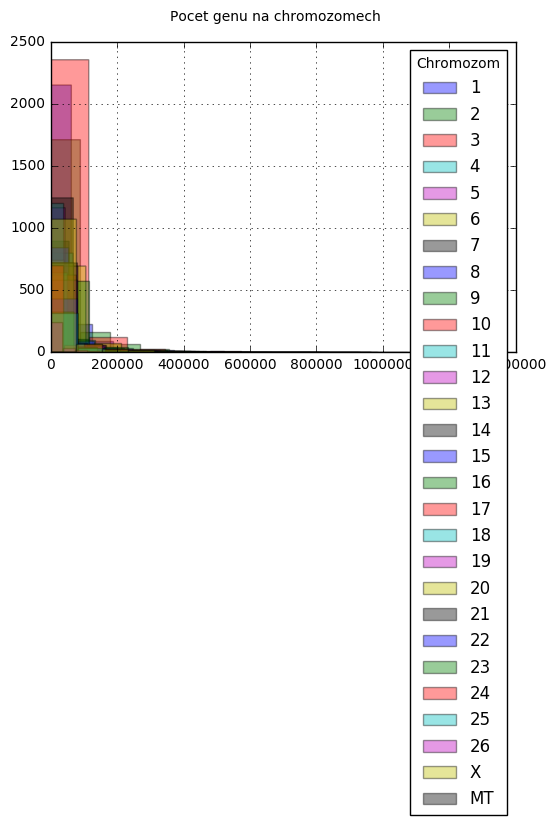

In [39]:
fig, ax = plt.subplots()
genes[genes.seqname =="1"].gene_size.hist(alpha=0.4, bins=15)
genes[genes.seqname =="2"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="3"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="4"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="5"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="6"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="7"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="8"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="9"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="10"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="11"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="12"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="13"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="14"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="15"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="16"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="17"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="18"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="19"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="20"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="21"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="22"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="23"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="24"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="25"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="26"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="X"].gene_size.hist(alpha=0.4, bins=12)
genes[genes.seqname =="MT"].gene_size.hist(alpha=0.4, bins=12)
ax.legend(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', 'X', 'MT'], title="Chromozom")
pl.suptitle("Pocet genu na chromozomech")

![](https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcSeQsWextVg29ehYa3qxnmwJ7ZMyUs-G4wNYjpWjeyYrL6OB3USGuy5dSZX)

## Problemy

In [32]:
gene_sort = genes.sort_values(by = "gene_size")
genes.head()
# z nejakeho duvodu nefunguje, proto jsem zvolila nahradni reseni viz nize

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_size
0,1,ensembl,gene,23392,176938,.,-,.,protein_coding,ENSOARG00000017577,ING5,153546
1,1,ensembl,gene,49751,49903,.,+,.,protein_coding,ENSOARG00000020430,NaN,152
2,1,ensembl,gene,79926,87689,.,+,.,protein_coding,ENSOARG00000017587,PDCD1,7763
3,1,ensembl,gene,91112,96882,.,+,.,lincRNA,ENSOARG00000025485,NaN,5770
4,1,ensembl,gene,105668,108573,.,-,.,protein_coding,ENSOARG00000017595,GAL3ST2,2905
